In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns

In [3]:
import os
print("Current Working Directory:", os.getcwd())
current_directory = os.getcwd()
train_path = os.path.join(current_directory, "dataset","Train")
valid_path = os.path.join(current_directory, "dataset","Valid")
test_path = os.path.join(current_directory, "dataset","Test")

Current Working Directory: d:\intership


## Parameter Breakdown

### `train_path`
- **Description**: The path to the directory containing the training images.
- **Details**: This directory should have subdirectories, with each subdirectory named after a class label, containing images of that class.

---

### `labels="inferred"`
- **Description**: The labels for the images are inferred from the subdirectory names in the `train_path`.
- **Example**: If `train_path` contains subdirectories `cats` and `dogs`, labels will be assigned as `cats = 0` and `dogs = 1` (or similar).

---

### `label_mode="categorical"`
- **Description**: Specifies the type of labels.
  - `"categorical"`: Labels are returned as one-hot encoded vectors.
  - `"int"`: Labels are returned as integers.
  - `None`: No labels are returned.
- **Details**: Here, labels are one-hot encoded, useful for classification tasks.

---

### `class_names=None`
- **Description**: Automatically determines class names from the subdirectory names.
- **Details**: You can specify a list like `['cats', 'dogs']` to manually define the class names.

---

### `color_mode="rgb"`
- **Description**: Specifies the image color mode.
  - `"rgb"`: Loads 3-channel color images.
  - `"grayscale"`: Loads single-channel grayscale images.
  - `"rgba"`: Loads 4-channel color images.
- **Details**: Here, images are loaded in RGB mode.

---

### `batch_size=32`
- **Description**: The number of images to be processed in a single batch during training.
- **Details**: Affects memory usage and training speed.

---

### `image_size=(128, 128)`
- **Description**: Resizes all images to the specified dimensions (128x128 pixels in this case).
- **Details**: Helps standardize input dimensions for the neural network.

---

### `shuffle=True`
- **Description**: Randomly shuffles the images before creating batches.
- **Details**: Helps reduce overfitting and ensures a diverse input distribution.

---

### `seed=None`
- **Description**: Used to set a random seed for reproducibility of the shuffle.
- **Details**: If `None`, results may vary across runs.

---

### `validation_split=None`
- **Description**: Specifies the fraction of data to be set aside for validation.
- **Example**: `validation_split=0.2` reserves 20% of data for validation.

---

### `subset=None`
- **Description**: Specifies whether this dataset is for training or validation when `validation_split` is set.
- **Options**: `"training"` or `"validation"`.
- **Details**: Must be used with `validation_split`.

---

### `interpolation="bilinear"`
- **Description**: Method used to resize the images.
- **Options**: `"nearest"`, `"bilinear"`, `"bicubic"`, etc.
- **Details**: `"bilinear"` is smooth and works well for resizing.

---

### `follow_links=False`
- **Description**: If `True`, follows symbolic links to access images.

---

### `crop_to_aspect_ratio=False`
- **Description**: If `True`, crops images to maintain their original aspect ratio before resizing.
- **Details**: If `False`, images are resized to `image_size` directly.


In [4]:
# function is used to create an image dataset from a directory structure where images are organized into subdirectories representing class labels
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 900 files belonging to 3 classes.


In [5]:
# Get the class labels
labels = training_set.class_names
print(labels)


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [7]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

c:\Users\vinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 753ms/step - accuracy: 0.3711 - loss: 1.9062 - val_accuracy: 0.4933 - val_loss: 1.0129
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 759ms/step - accuracy: 0.5713 - loss: 0.8933 - val_accuracy: 0.7267 - val_loss: 0.5850
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 768ms/step - accuracy: 0.7430 - loss: 0.5875 - val_accuracy: 0.7967 - val_loss: 0.5308
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 877ms/step - accuracy: 0.7506 - loss: 0.6078 - val_accuracy: 0.8133 - val_loss: 0.4352
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 807ms/step - accuracy: 0.7769 - loss: 0.4832 - val_accuracy: 0.8767 - val_loss: 0.2674
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 777ms/step - accuracy: 0.8876 - loss: 0.2556 - val_accuracy: 0.8067 - val_loss: 0.5326
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 790ms/step - accuracy: 0.8544 - loss: 0.3431 - val_accuracy: 0.8967 - val_loss: 0.2914
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 803ms/step - accuracy: 0.9262 - loss: 0.2028 - val_accu

In [11]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - accuracy: 0.9623 - loss: 0.0962
Training accuracy: 0.9677777886390686


In [12]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.9461 - loss: 0.1515
Validation accuracy: 0.9266666769981384


In [13]:
cnn.save('trained_plant_disease_model.keras')

In [14]:
training_history.history

{'accuracy': [0.3933333456516266,
  0.6333333253860474,
  0.7400000095367432,
  0.7699999809265137,
  0.8311111330986023,
  0.8866666555404663,
  0.8922222256660461,
  0.9388889074325562,
  0.9300000071525574,
  0.9133333563804626],
 'loss': [1.411635160446167,
  0.7825899124145508,
  0.5925845503807068,
  0.546593964099884,
  0.40436363220214844,
  0.27452558279037476,
  0.26362594962120056,
  0.1773001104593277,
  0.1799304336309433,
  0.19711917638778687],
 'val_accuracy': [0.4933333396911621,
  0.7266666889190674,
  0.79666668176651,
  0.8133333325386047,
  0.8766666650772095,
  0.8066666722297668,
  0.8966666460037231,
  0.9333333373069763,
  0.9200000166893005,
  0.9266666769981384],
 'val_loss': [1.01289963722229,
  0.5850197076797485,
  0.5307806134223938,
  0.43519067764282227,
  0.26740965247154236,
  0.5325857996940613,
  0.29140353202819824,
  0.1797325313091278,
  0.21695080399513245,
  0.18393105268478394]}

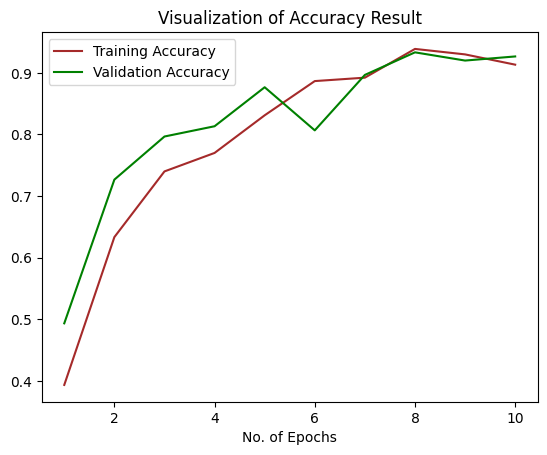

In [15]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()